In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
data.shape

(891, 12)

потом найти более полные данные

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


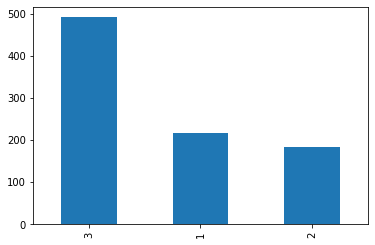

In [4]:
data['Pclass'].value_counts().plot.bar()

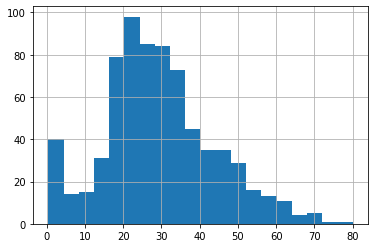

In [5]:
fig = data.Age.hist(bins=20)

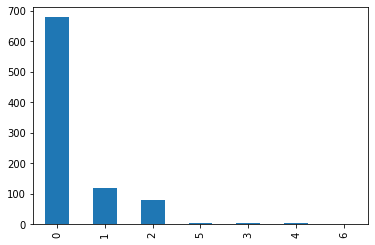

In [6]:
data['Parch'].value_counts().plot.bar()

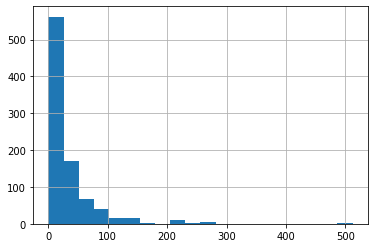

In [7]:
data.Fare.hist(bins=20)

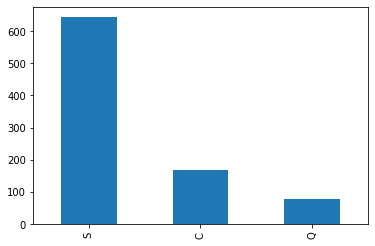

In [8]:
data['Embarked'].value_counts().plot.bar()

In [85]:
#значим ли Parch? 3,4,5,6 - редкость, 1-2 имеют чуть больше шансов чем 0(где вдвое больше погибло)
data.groupby(['Parch','Survived'])['PassengerId'].count()

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: PassengerId, dtype: int64

In [9]:
#выживаемость по полу
data.groupby(['Sex','Survived'])['PassengerId'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

In [10]:
data.groupby('Sex')['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [11]:
data['PassengerId'].count()

891

In [12]:
data[data['Sex']=='male'].groupby(data['Survived'])['PassengerId'].count()

Survived
0    468
1    109
Name: PassengerId, dtype: int64

In [13]:
#выжило 74% женщин и 18% мужчин
data.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

# Missing values

In [14]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
#пропуски в процентах ~20% по возрасту и 77% без указания кабины
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [17]:
#у 87% невыживших кабина не указана, это существенно
data['Cabin'].isnull().groupby(data['Survived']).mean()

Survived
0    0.876138
1    0.602339
Name: Cabin, dtype: float64

In [18]:
#по возрасту тоже слегка больше погибших возраст которых не известен
data['Age'].isnull().groupby(data['Survived']).mean()

Survived
0    0.227687
1    0.152047
Name: Age, dtype: float64

# вариант визуализации

In [19]:
## Histograms
dataset2 = data.drop(columns = ['Name', 'Ticket', 'Cabin'])
dataset2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [20]:
data_OHE = pd.concat([dataset2[['PassengerId', 'Survived', 'Pclass']], # numerical variables 
                      pd.get_dummies(dataset2.Sex, drop_first=True),   # binary categorical variable
                      dataset2[['Age', 'SibSp', 'Parch', 'Fare']],
                      pd.get_dummies(dataset2.Embarked, drop_first=True)],  # k categories in categorical
                    axis=1)

data_OHE.head()

,PassengerId,Survived,Pclass,male,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1


C:\Anaconda3\envs\py36\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\envs\py36\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


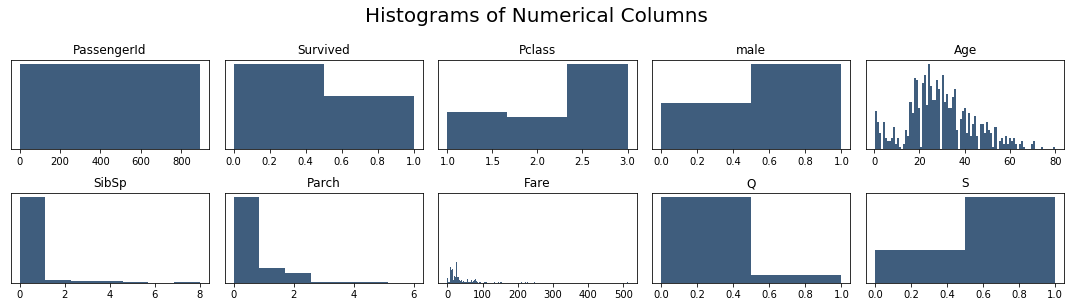

In [21]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, data_OHE.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(data_OHE.columns.values[i - 1])

    vals = np.size(data_OHE.iloc[:, i - 1].unique())
    
    plt.hist(data_OHE.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

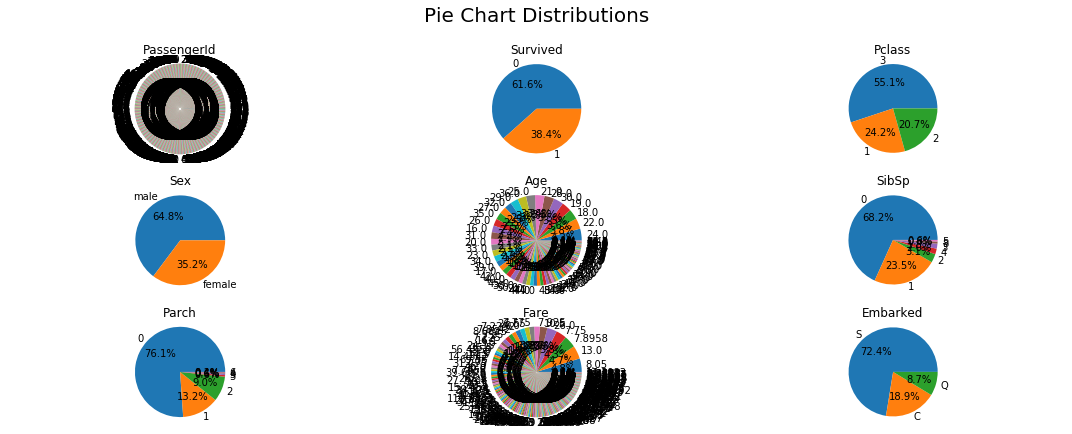

In [22]:
## Pie Plots
#dataset2 = dataset[['PassengerId', 'Survived', 'Pclass',
#                    'Sex', 'Age', 'SibSp',
#                    'Parch', 'Fare', 'Embarked']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

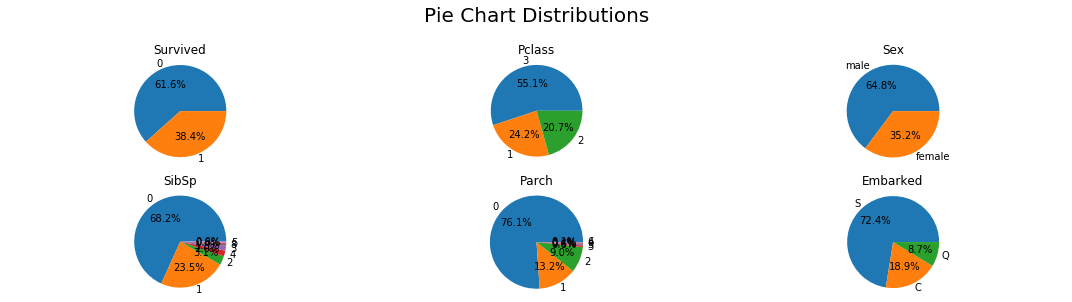

In [23]:
dataset3 = dataset2[['Survived', 'Pclass',
                    'Sex', 'SibSp',
                    'Parch', 'Embarked']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset3.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset3.columns.values[i - 1])
   
    values = dataset3.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset3.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# исследование подмножества с указанными кабинами

In [24]:
cabin = data['Cabin'].unique()
cabin

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [25]:
data[data['Cabin']=='E17']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.55,E17,S


# numpy.delete(a, obj, axis=None)
Функция delete() удаляет указанные элементы на указанной оси.

Параметры:

a - подобный массиву объект Любой объект который может быть преобразован в массив NumPy.

obj - срез, целое число или последовательность целых чисел
Определяет позицию удаляемых подмассивов. В случае если необходимо указать срез массива, то необходимо использовать объект среза, например, np.s_[2:5] или сам срез массива a[2:5]. Если просто указать [2:5] то это приведет к ошибке.

axis - целое число (необязательный)
Определяет ось, элементы вдоль которой необходимо удалить. По умолчанию axis = None, что соответствует сжиманию входного массива до одной оси и созданию так же одномерного результирующего массива без указанных подмассивов.

Возвращает:
ndarray - массив NumPy
Копия исходного массива без указанных подмассивов.

In [26]:
#удаляю первый элемент
cabin = np.delete(cabin,np.s_[0])

In [27]:
cabin

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24

In [28]:
for cab in cabin:
    print(data[data['Cabin']==cab][['Survived','Sex','Age','Fare']])

   Survived     Sex   Age     Fare
1         1  female  38.0  71.2833
     Survived     Sex   Age  Fare
3           1  female  35.0  53.1
137         0    male  37.0  53.1
   Survived   Sex   Age     Fare
6         0  male  54.0  51.8625
     Survived     Sex   Age     Fare
10          1  female   4.0  16.7000
205         0  female   2.0  10.4625
251         0  female  29.0  10.4625
394         1  female  24.0  16.7000
    Survived     Sex   Age   Fare
11         1  female  58.0  26.55
    Survived   Sex   Age  Fare
21         1  male  34.0  13.0
    Survived   Sex   Age  Fare
23         1  male  28.0  35.5
     Survived     Sex   Age   Fare
27          0    male  19.0  263.0
88          1  female  23.0  263.0
341         1  female  24.0  263.0
438         0    male  64.0  263.0
    Survived     Sex  Age      Fare
31         1  female  NaN  146.5208
     Survived     Sex   Age     Fare
52          1  female  49.0  76.7292
645         1    male  48.0  76.7292
    Survived   Sex   Age   

     Survived   Sex   Age     Fare
701         1  male  35.0  26.2875
707         1  male  42.0  26.2875
     Survived     Sex   Age     Fare
710         1  female  24.0  49.5042
     Survived     Sex   Age     Fare
716         1  female  38.0  227.525
     Survived     Sex   Age  Fare
724         1    male  27.0  53.1
809         1  female  33.0  53.1
     Survived   Sex   Age      Fare
737         1  male  35.0  512.3292
     Survived   Sex  Age  Fare
740         1  male  NaN  30.0
     Survived   Sex   Age   Fare
741         0  male  36.0  78.85
     Survived   Sex   Age  Fare
748         0  male  19.0  53.1
     Survived     Sex   Age    Fare
751         1    male   6.0  12.475
823         1  female  27.0  12.475
     Survived     Sex   Age     Fare
765         1  female  51.0  77.9583
     Survived     Sex   Age  Fare
772         0  female  57.0  10.5
     Survived   Sex  Age  Fare
776         0  male  NaN  7.75
     Survived     Sex   Age      Fare
779         1  female  43.0  21

In [55]:
df = pd.DataFrame(columns=['Survived','Sex','Age','Fare','Cabin'])
df

,Survived,Sex,Age,Fare,Cabin


In [99]:
for cab in cabin:
    df = df.append(data[data['Cabin']==cab][['Survived','Sex','Age','Fare','Cabin']])
df.head()

,Survived,Sex,Age,Fare,Cabin
1,1,female,38.0,71.2833,C85
3,1,female,35.0,53.1000,C123
137,0,male,37.0,53.1000,C123
6,0,male,54.0,51.8625,E46
10,1,female,4.0,16.7000,G6


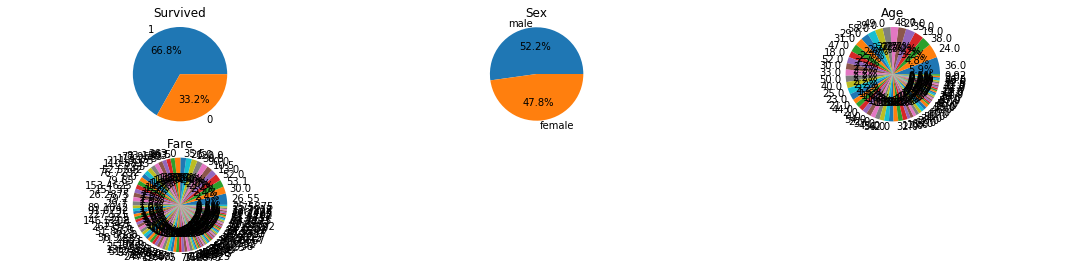

In [52]:
fig = plt.figure(figsize=(15, 12))
for i in range(1, df.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df.columns.values[i - 1])
   
    values = df.iloc[:, i - 1].value_counts(normalize = True).values
    index = df.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

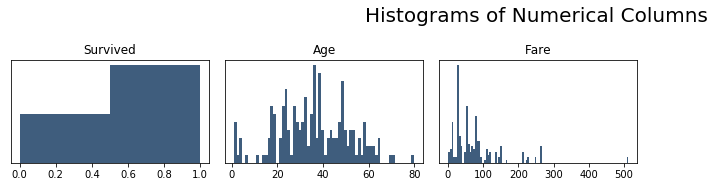

In [53]:
df2 = df[['Survived','Age','Fare']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, df2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])

    vals = np.size(df2.iloc[:, i - 1].unique())
    
    plt.hist(df2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [58]:
df.sort_values(['Age', 'Fare'], ascending=[True, False])

,Survived,Sex,Age,Fare,Cabin
305,1,male,0.92,151.5500,C22 C26
183,1,male,1.00,39.0000,F4
297,0,female,2.00,151.5500,C22 C26
340,1,male,2.00,26.0000,F2
205,0,female,2.00,10.4625,G6
193,1,male,3.00,26.0000,F2
445,1,male,4.00,81.8583,A34
618,1,female,4.00,39.0000,F4
10,1,female,4.00,16.7000,G6
751,1,male,6.00,12.4750,E121


In [61]:
df.sort_values('Fare', ascending=False)

,Survived,Sex,Age,Fare,Cabin
737,1,male,35.00,512.3292,B101
679,1,male,36.00,512.3292,B51 B53 B55
27,0,male,19.00,263.0000,C23 C25 C27
438,0,male,64.00,263.0000,C23 C25 C27
88,1,female,23.00,263.0000,C23 C25 C27
341,1,female,24.00,263.0000,C23 C25 C27
311,1,female,18.00,262.3750,B57 B59 B63 B66
742,1,female,21.00,262.3750,B57 B59 B63 B66
299,1,female,50.00,247.5208,B58 B60
118,0,male,24.00,247.5208,B58 B60


# Сколько женщин и детей? 
Титаник являлся британским кораблем, а согласно законам Британии на корабле должно было быть число шлюпок, соответствующее водоизмещению судна, а не пассажировместимости. Титаник формально соответствовал этим требованиям и имел 20 шлюпок (14 со вместимостью 65 человек, 2 — 40 человек, 4 — 47 человек), которые были рассчитаны на погрузку 1178 человек, всего же на Титанике было 2208 человек. Таким образом, зная, что шлюпок на всех не хватит, капитан Титаника Смит отдал, после столкновения с айсбергом, приказ брать на шлюпки только женщин и детей. Однако члены команды не всегда следовали ему.

In [122]:
#детей
data[data['Age']<18].groupby(['Survived','Pclass'])['PassengerId'].count()

Survived  Pclass
0         1          1
          2          2
          3         49
1         1         11
          2         21
          3         29
Name: PassengerId, dtype: int64

In [124]:
data[data['Age']<18].groupby('Survived')['PassengerId'].count()

Survived
0    52
1    61
Name: PassengerId, dtype: int64

In [126]:
#женщин старше 18
data[(data['Sex']=='female') & (data['Age']>18)].groupby(['Survived','Pclass'])['Sex'].count()

Survived  Pclass
0         1          2
          2          6
          3         34
1         1         72
          2         54
          3         25
Name: Sex, dtype: int64

In [127]:
data[(data['Sex']=='female') & (data['Age']>18)].groupby('Survived')['Sex'].count()

Survived
0     42
1    151
Name: Sex, dtype: int64

In [119]:
#короче женщин и детей
data[((data['Sex']=='female') & (data['Age']>18)) | (data['Age']<18)].groupby('Survived')['Sex'].count()

Survived
0     94
1    212
Name: Sex, dtype: int64

In [121]:
#главным образом женщины-дети не спасены из 3го класса
data[((data['Sex']=='female') & (data['Age']>18)) | (data['Age']<18)].groupby(['Survived','Pclass'])['Sex'].count()

Survived  Pclass
0         1          3
          2          8
          3         83
1         1         83
          2         75
          3         54
Name: Sex, dtype: int64

### в зависимости от цены билета

In [79]:
#вся выборка
data[data['Fare']<100].groupby(data['Survived'])['Sex'].count()

Survived
0    535
1    303
Name: Sex, dtype: int64

In [70]:
#с указанными кабинами
df[df['Fare']<100].groupby(df['Survived'])['Sex'].count()

Survived
0     56
1    105
Name: Sex, dtype: int64

### в зависимости от возраста

In [77]:
#вся выборка
data[data['Age']>50].groupby(data['Survived'])['Sex'].count()

Survived
0    42
1    22
Name: Sex, dtype: int64

In [78]:
#с указанными кабинами
df[df['Age']>50].groupby(df['Survived'])['Sex'].count()

Survived
0    16
1    17
Name: Sex, dtype: int64

# теперь позаполняем пропуски

In [86]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
#ещё раз что в каких долях пропущено
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Cabin заменить на указана\неуказана, т.к. это MNAR (missed no at random) и их 687 - большинство

In [98]:
data[data['Cabin'].isnull()==True]['PassengerId'].count()

687

In [ ]:
#созд нов бинарную колонку по кабине нул-ненул
data['nullcab'] = np.where(data['Cabin'].isnull(), 1, 0)

In [91]:
#Embarked - видимо MAR, т.к. 2 пропущенных
data[data['Embarked'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


вероятно хорошо  бы сделать отдельную колонку с пометкой пропущенна информация по возрасту(LostAge) - их 177

In [ ]:
#созд нов бинарную колонку по Age нул-ненул
data['nullage'] = np.where(data['Age'].isnull(), 1, 0)

In [93]:
#как заполнить эти пропуски?
data[data['Age'].isnull()==True].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [97]:
data[data['Age'].isnull()==True]['PassengerId'].count()

177

# Далее

дропнуть Name и Ticket
отуанхотэнкодить Sex, Embarked
Cabin заменить на указана\неуказана
Age побить на группы по 10летиям
Pclass заменить на бинарный: 3й класс или нет (т.к. приговором чаще была 3-еклассововсть)